In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df1=pd.read_csv('C:\\Machine Project\\dataset\\tmdb_6000_movie_dataset.csv')
df3=pd.read_csv('C:\\Machine Project\\dataset\\tmdb_6000_movie_ratings.csv')

In [4]:
print(df1.shape)
df1.head(2)

(5798, 21)


,Unnamed: 0,budget,genres,homepage,tmdbId,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [6]:
print(df3.shape)
df3.head(2)

(24537619, 4)


,tmdbId,userId,rating,timestamp
0,19995,10.0,3.5,2015-05-03 15:28:22
1,19995,14.0,3.5,2011-07-24 18:47:52


In [7]:
import json

# Define a function to preprocess JSON-like strings before loading them
def preprocess_json_string(s):
    # Replace single quotes with double quotes to ensure correct JSON format
    s = s.replace("'", '"')
    # Return the preprocessed string
    return s

# Apply preprocessing to the entire 'genres' column
df1['genres'] = df1['genres'].apply(preprocess_json_string)

# Convert JSON strings to Python objects
df1['genres'] = df1['genres'].apply(json.loads)

# Iterate over each row to extract genre names
for index, i in zip(df1.index, df1['genres']):
    list1 = []
    # Check if the 'genres' column contains a list of dictionaries
    if isinstance(i, list):
        for j in i:
            # Check if the dictionary has the 'name' key
            if 'name' in j:
                list1.append(j['name'])  # Append the genre name to the list
    # Convert the list of genre names to a string and update the 'genres' column
    df1.loc[index, 'genres'] = str(list1)

# Display the modified DataFrame
df1.head()

,Unnamed: 0,budget,genres,homepage,tmdbId,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
import json

# Define a function to fix JSON strings
def fix_json(json_str):
    try:
        json.loads(json_str)  # Attempt to load the JSON string
        return json_str  # If successful, return the original JSON string
    except json.JSONDecodeError:
        # If decoding fails, attempt to fix the JSON string
        # Add a missing comma at the end
        if json_str.endswith('}'):
            fixed_json_str = json_str[:-1] + ',' + '}'
            try:
                json.loads(fixed_json_str)  # Attempt to load the fixed JSON string
                return fixed_json_str  # If successful, return the fixed JSON string
            except json.JSONDecodeError:
                pass  # If still unsuccessful, return the original JSON string
        # Replace single quotes with double quotes
        fixed_json_str = json_str.replace("'", '"')
        try:
            json.loads(fixed_json_str)  # Attempt to load the fixed JSON string
            return fixed_json_str  # If successful, return the fixed JSON string
        except json.JSONDecodeError:
            pass  # If still unsuccessful, return the original JSON string
    return "Unknown"  # Return the original JSON string if no fix was applied

# Define a function to convert JSON strings to string format
def json_to_string(json_str):
    try:
        key_data = json.loads(json_str)  # Convert JSON string to Python object
        key_names = [entry['name'] for entry in key_data]
        return str(key_names)  # Convert list of names to string
    except json.JSONDecodeError:
        return "Unknown"  # Return the original JSON string if decoding fails

# Assuming df1 is your DataFrame and 'cast' is the column you want to process
# Process entire DataFrame at once
df1['keywords'] = df1['keywords'].apply(fix_json)
df1['keywords'] = df1['keywords'].apply(json_to_string)

# Now df1 contains the modified dataframe

df1.head()


,Unnamed: 0,budget,genres,homepage,tmdbId,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,Unknown,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [25]:
# Check for missing values
missing_values = df3.isnull().any()

# Check for duplicates
duplicates = df3.duplicated().any()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

Missing Values:
tmdbId       False
userId       False
rating       False
timestamp    False
dtype: bool

Duplicates:
False


In [26]:
df3 = df3.drop(columns=['timestamp'])
print(df3.shape)

(24537619, 3)


In [27]:
# Create a user-movie matrix with empty values
df_p = df3.pivot_table(index='userId', columns='tmdbId', values='rating')
df_p.sample(6)

tmdbId,5,11,12,13,14,16,18,19,20,22,...,1045944,1059638,1064517,1070802,1074034,1076487,1094319,1098110,1102776,1107872
userId,,,,,,,,,,,,,,,,,,,,,
247997.0,NaN,2.5,5.0,NaN,5.0,NaN,5.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191351.0,NaN,4.0,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213847.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201873.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#create mappings
user_ids = df3["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

movie_ids = df3["tmdbId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df3["user"] = df3["userId"].map(user2user_encoded)
df3["movie"] = df3["tmdbId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)

df3 = df3.sample(frac=1, random_state=42)
x = df3[["user", "movie"]].values
# Normalize the targets between 0 and 1.
#y = df["rating"].values
y = df3["rating"].apply(lambda x: (x - 0.5) / (4.5)).values

# Prepare training, validation and testing data 
# training on 90% of the data, validating on 10% and testing on 1000 seperate samples.

train_indices = int(0.8 * df3.shape[0])  # 80% of the dataset for training
val_indices = int(0.1 * df3.shape[0])    # 10% of the dataset for validation
test_indices = int(0.1 * df3.shape[0])   # 10% of the dataset for testing

x_train, x_val, x_test, y_train, y_val, y_test = (
    x[:train_indices],
    x[train_indices:train_indices+val_indices],
    x[train_indices+val_indices:train_indices+val_indices+test_indices],
    y[:train_indices],
    y[train_indices:train_indices+val_indices],
    y[train_indices+val_indices:train_indices+val_indices+test_indices]
)


In [29]:
# To create deep learning models
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Embedding, Reshape, Dot, Concatenate, Dense, Dropout
from keras.models import Model
from keras.utils.vis_utils import plot_model

# To stack sparse matrices
from scipy.sparse import vstack
# For visulazation
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [30]:
# Number of samples for training
num_train_samples = x_train.shape[0]

# Number of samples for validation
num_val_samples = x_val.shape[0]

print("Train on", num_train_samples, "samples, validate on", num_val_samples, "samples.")


Train on 19630095 samples, validate on 2453761 samples.


In [31]:
#embed both users and movies in to 50-dimensional vectors
embedding_size= 50

# Create model
# Set input layers
user_id_input = Input(shape=[1], name='user')
movie_id_input = Input(shape=[1], name='movie')

# Create embedding layers for users and movies
user_embedding = Embedding(output_dim=embedding_size, 
                           input_dim=num_users,
                           input_length=1, 
                           embeddings_initializer="he_normal",
                           embeddings_regularizer=keras.regularizers.l2(1e-6),
                           name='user_embedding')(user_id_input)
movie_embedding = Embedding(output_dim=embedding_size, 
                            input_dim=num_movies,
                            input_length=1, 
                            embeddings_initializer="he_normal",
                            embeddings_regularizer=keras.regularizers.l2(1e-6),
                            name='movie_embedding')(movie_id_input)

# Reshape the embedding layers
user_vector = Reshape([embedding_size])(user_embedding)
movie_vector = Reshape([embedding_size])(movie_embedding)

# Concatenate the reshaped embedding layers
concat = Concatenate()([user_vector, movie_vector])
#concat = Dot(1, normalize=False)([user_vector, movie_vector])

# Combine with dense layers
dense1 = Dense(256)(concat)
dense = Dropout(0.2)(dense1)
y = Dense(1, activation="sigmoid")(dense) # The sigmoid activation forces the rating to between 0 and 1


# compile model
model = Model(inputs=[user_id_input, movie_id_input], outputs=y)
model.compile(loss='mse',  optimizer = 'adam')
 
# Fit the model
history = model.fit(x = [x_train[:,0],x_train[:,1]],
          y = y_train,
          batch_size=256, 
          epochs=4,
          validation_data = ([x_val[:,0], x_val[:,1]], y_val),
          )


Epoch 1/4
76681/76681 [==============================] - 546s 7ms/step - loss: 0.0412 - val_loss: 0.0405
Epoch 2/4
76681/76681 [==============================] - 560s 7ms/step - loss: 0.0405 - val_loss: 0.0404
Epoch 3/4
76676/76681 [============================>.] - ETA: 0s - loss: 0.0405

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 movie (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 50)        16442950    ['user[0][0]']                   
                                                                                                  
 movie_embedding (Embedding)    (None, 1, 50)        269600      ['movie[0][0]']                  
                                                                                              

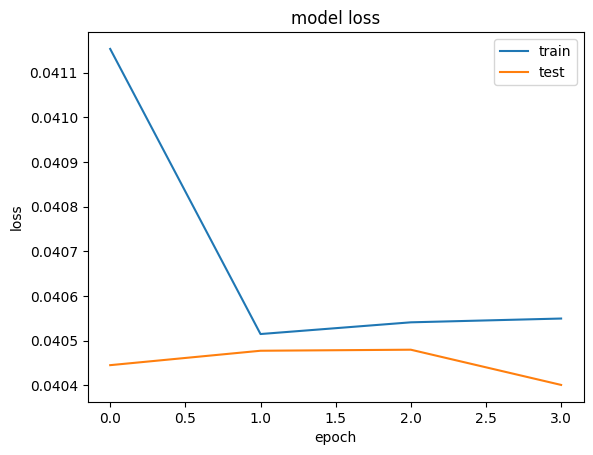

In [ ]:

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

In [ ]:
#  Compute RMSE
y_pred = model.predict([x_test[:,0], x_test[:,1]])
y_true =  y_test

rmse = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_true))
print('\n\nTesting Result : {:.4f} RMSE'.format(rmse))

76681/76681 [==============================] - 73s 950us/step


Testing Result : 0.1970 RMSE


In [ ]:
# Test model
p , a = (model.predict([x_test[:15,0], x_test[:15,1]]) , y_test[:15])
print("ratings are Normalized between 0 and 1 (0.5 - 5.0)")
for i in range(len(p)):
    print("predicted rating is : "+ str(np.round(p[i],2)) +"\tactual rating was : "+ str(round(a[i],2)) )

1/1 [==============================] - 0s 14ms/step
ratings are Normalized between 0 and 1 (0.5 - 5.0)
predicted rating is : [0.52]	actual rating was : 0.44
predicted rating is : [0.79]	actual rating was : 0.78
predicted rating is : [0.64]	actual rating was : 0.78
predicted rating is : [0.6]	actual rating was : 0.56
predicted rating is : [0.61]	actual rating was : 0.56
predicted rating is : [0.56]	actual rating was : 0.56
predicted rating is : [0.25]	actual rating was : 0.56
predicted rating is : [0.56]	actual rating was : 0.67
predicted rating is : [0.82]	actual rating was : 0.89
predicted rating is : [0.64]	actual rating was : 0.78
predicted rating is : [0.56]	actual rating was : 0.22
predicted rating is : [0.71]	actual rating was : 0.56
predicted rating is : [0.82]	actual rating was : 0.89
predicted rating is : [0.86]	actual rating was : 1.0
predicted rating is : [0.81]	actual rating was : 0.56


In [ ]:
print(df1.columns)

Index(['Unnamed: 0', 'budget', 'genres', 'homepage', 'tmdbId', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
df1 = df1.drop(columns=['Unnamed: 0','budget','homepage','original_title','production_companies','production_countries','revenue','spoken_languages','status','tagline'])
df1.head(2)

,genres,tmdbId,keywords,original_language,overview,popularity,release_date,runtime,title,vote_average,vote_count
0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,"['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Avatar,7.2,11800
1,"['Adventure', 'Fantasy', 'Action']",285,Unknown,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
df1.index.name = 'index'
df1.head(2)

,genres,tmdbId,keywords,original_language,overview,popularity,release_date,runtime,title,vote_average,vote_count
index,,,,,,,,,,,
0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,"['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,162.0,Avatar,7.2,11800
1,"['Adventure', 'Fantasy', 'Action']",285,Unknown,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
# Check for missing values
missing_values = df1.isnull().any()

# Check for duplicates
duplicates = df1.duplicated().any()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

Missing Values:
genres               False
tmdbId               False
keywords             False
original_language    False
overview              True
popularity           False
release_date          True
runtime               True
title                False
vote_average         False
vote_count           False
dtype: bool

Duplicates:
False


In [ ]:
#Count missing values in the 'overview' column
overview_missing_count = df1['overview'].isnull().sum()

# Print the count of missing values in the 'overview' column
print("Count of missing values in the 'overview' column:", overview_missing_count)

# Find rows with missing values in the 'overview' column
rows_with_missing_overview = df1[df1['overview'].isnull()]

# Display the rows with missing values in the 'overview' column
print("Rows with missing values in the 'overview' column:")
print(rows_with_missing_overview)

Count of missing values in the 'overview' column: 7
Rows with missing values in the 'overview' column:
                        genres   tmdbId  \
index                                     
2656                 ['Drama']   370980   
4140           ['Documentary']   459488   
4431           ['Documentary']   292539   
5225                        []  1164486   
5378                ['Horror']   917281   
5755       ['Comedy', 'Drama']  1074080   
5795   ['Action', 'Adventure']   998623   

                                                keywords original_language  \
index                                                                        
2656                               ['pope', 'biography']                it   
4140   ['music', 'actors', 'legendary perfomer', 'cla...                en   
4431                                                  []                de   
5225                                                  []                pt   
5378                                     

In [ ]:
#fill missing values with a default description
df1['overview'] = df1['overview'].fillna('No overview available')
# Count missing values in the 'overview' column
overview_missing_count = df1['overview'].isnull().sum()

# Print the count of missing values in the 'overview' column
print("Count of missing values in the 'overview' column:", overview_missing_count)

Count of missing values in the 'overview' column: 0


In [ ]:
print(df1.columns)

Index(['genres', 'tmdbId', 'keywords', 'original_language', 'overview',
       'popularity', 'release_date', 'runtime', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [ ]:
duplicates_specific_columns = df1.duplicated(subset=['genres', 'tmdbId', 'keywords', 'original_language', 'overview',
       'popularity', 'release_date', 'runtime', 'title', 'vote_average',
       'vote_count']).any()
print("\nDuplicates based on specific columns:")
print(duplicates_specific_columns)


Duplicates based on specific columns:
False


In [ ]:
print(df1['release_date'].isnull().sum())
print(df1['runtime'].isnull().sum())

df1.dropna(subset=['release_date', 'runtime'], inplace=True)

1
2


In [ ]:
# Check for duplicates
duplicates = df1.duplicated().any()
print("\nDuplicates:")
print(duplicates)

# Check for missing values
missing_values = df1.isnull().any()
print("Missing Values:")
print(missing_values)


Duplicates:
False
Missing Values:
genres               False
tmdbId               False
keywords             False
original_language    False
overview             False
popularity           False
release_date         False
runtime              False
title                False
vote_average         False
vote_count           False
dtype: bool


In [ ]:
# display recommendations
def get_recomendations(user_id):
      movies_watched_by_user = df3[df3.userId == user_id]
      movies_not_watched = df1[
          ~df1["tmdbId"].isin(movies_watched_by_user.tmdbId.values)]["tmdbId"]
      movies_not_watched = list(
          set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
      )
      movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
      user_encoder = user2user_encoded.get(user_id)
      user_movie_array = np.hstack(
          ([[user_id]] * len(movies_not_watched), movies_not_watched)
      )

      ratings = model.predict([user_movie_array[:,0], user_movie_array[:,1]]).flatten()

      top_ratings_indices = ratings.argsort()[-10:][::-1]
      recommended_movie_ids = [
          movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
      ]

      print("Showing recommendations for user: {}".format(user_id))
      print("=" * 36)
      print("Movies with high ratings from user")
      print("-" * 34)
      top_movies_user = (
          movies_watched_by_user.sort_values(by="rating", ascending=False)
          .head(5)
          .tmdbId.values
      )
      movie_df_rows = df1[df1["tmdbId"].isin(top_movies_user)]
      for row in movie_df_rows.itertuples():
          print(row.title, ":", row.genres)

      print("-" * 30)
      print(" Top 10 movie recommendations")
      print("-" * 30)
      recommended_movies = df1[df1["tmdbId"].isin(recommended_movie_ids)]
      for row in recommended_movies.itertuples():
          print(row.title, ":", row.genres)

In [ ]:
#enter a user_id 
get_recomendations(1)

167/167 [==============================] - 0s 1ms/step
Showing recommendations for user: 1
Movies with high ratings from user
----------------------------------
Transformers : ['Adventure', 'Science Fiction', 'Action']
Monsters, Inc. : ['Animation', 'Comedy', 'Family']
Forrest Gump : ['Comedy', 'Drama', 'Romance']
The Sixth Sense : ['Mystery', 'Thriller', 'Drama']
Die Hard : ['Action', 'Thriller']
------------------------------
 Top 10 movie recommendations
------------------------------
The Shawshank Redemption : ['Drama', 'Crime']
The Godfather: Part II : ['Drama', 'Crime']
The Godfather : ['Drama', 'Crime']
The Usual Suspects : ['Drama', 'Crime', 'Thriller']
City of God : ['Drama', 'Crime']
Seven Samurai : ['Action', 'Drama']
12 Angry Men : ['Drama']
Chungking Express : ['Drama', 'Comedy', 'Romance']
Come and See : ['Drama', 'War']
Parasite : ['Comedy', 'Thriller', 'Drama']
